## 1 Data Pre-processing using Pipeline

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Load the data from CSV files
df1 = pd.read_csv('C:/Users/Nadir/Desktop/general_data.csv')
df2 = pd.read_csv('C:/Users/Nadir/Desktop/manager_survey_data.csv')
df3 = pd.read_csv('C:/Users/Nadir/Desktop/employee_survey_data.csv')
df4 = pd.read_csv('C:/Users/Nadir/Desktop/in_time.csv')
df5 = pd.read_csv('C:/Users/Nadir/Desktop/out_time.csv')

# Rename the first column to 'EmployeeID' for both DataFrames
df4.columns.values[0] = 'EmployeeID'
df5.columns.values[0] = 'EmployeeID'

# Drop columns with all NaN values
df4 = df4.dropna(axis=1, how='all')
df5 = df5.dropna(axis=1, how='all')

# Convert date columns to datetime objects
in_dates = df4.columns[1:]
out_dates = df5.columns[1:]

for date in in_dates:
    df4[date] = pd.to_datetime(df4[date])
for date in out_dates:
    df5[date] = pd.to_datetime(df5[date])

# Create a new DataFrame to store the time attended
df6 = df4.copy()

# Subtract corresponding values in entre table from sortie table
for date in in_dates:
    df6[date] = (df5[date] - df4[date]).dt.total_seconds() / 3600

# Replace NaN values with 0
df6 = df6.fillna(0)

# Calculate the mean for each row
df6['AVG_Work_Time'] = df6[in_dates].mean(axis=1)

# Assuming df4 is your DataFrame and columns_to_convert is already defined
df6 = df6.drop(columns=in_dates)

# Merge all five DataFrames
df = pd.merge(df1, df2, on='EmployeeID').merge(df3, on='EmployeeID').merge(df6, on='EmployeeID')

# Drop useless and non-ethical columns
columns_to_drop = ['EmployeeCount', 'EmployeeID', 'Gender', 'MaritalStatus', 'Over18', 'StandardHours']
df = df.drop(columns=columns_to_drop)

# Re-map Attrition "target column"
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Custom mapping for 'BusinessTravel' column
business_travel_mapping = {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}
df['BusinessTravel'] = df['BusinessTravel'].map(business_travel_mapping)

# Function to apply one-hot encoding to a column and merge it back to the DataFrame
def apply_one_hot_encoding(df, column):
    one_hot_encoded = pd.get_dummies(df[column], prefix=column)
    one_hot_encoded = one_hot_encoded.astype(int)
    df = pd.concat([df, one_hot_encoded], axis=1)
    df.drop(column, axis=1, inplace=True)
    return df

# Apply one-hot encoding to categorical columns
categorical_columns = ['Department', 'EducationField', 'JobRole']
for column in categorical_columns:
    df = apply_one_hot_encoding(df, column)

# Fill NaN values with the corresponding column mean and convert to integers
df = df.fillna(df.mean(skipna=True))

# Moving 'Attrition' column to the first position
cols = list(df.columns)
cols.remove('Attrition')  # Remove 'Attrition' from the list of columns
cols.insert(0, 'Attrition')  # Insert 'Attrition' as the first column
df = df[cols]

# Standard scale the selected columns
columns_to_scale = df.columns[1:]
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Data pipeline is complete, df contains the transformed and scaled data
df.head()

C:\Users\Nadir\AppData\Local\Temp\ipykernel_17524\2523337015.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df6['AVG_Work_Time'] = df6[in_dates].mean(axis=1)


,Attrition,Age,BusinessTravel,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,0,1.541369,-0.162399,-0.393938,-0.891688,-0.961486,1.405136,-0.679777,-1.150554,-0.932014,...,-0.314093,3.197088,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625
1,1,-0.648668,1.717339,0.099639,-1.868426,-0.961486,-0.491661,-1.080866,2.129306,0.241988,...,-0.314093,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625
2,0,-0.539166,1.717339,0.963398,1.061787,1.749610,2.725053,-0.679777,-0.057267,2.589994,...,-0.314093,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625
3,0,0.117845,-2.042138,-0.887515,2.038524,0.845911,0.386301,0.122400,-1.150554,2.589994,...,-0.314093,-0.312785,5.221995,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625
4,0,-0.539166,-0.162399,0.099639,-1.868426,-0.961486,-0.884109,0.523489,-0.877232,1.415991,...,-0.314093,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625


## 2 Data Splitting

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [3]:
# Assuming df is your DataFrame
X = df.iloc[:, 1:]  # Features
y = df.iloc[:, 0]   # Target variable (assuming the first column is the target)

# Instantiate StratifiedShuffleSplit with the desired test size and random state
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=29)
# or X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42, stratify=y)

# Use the split method to get the indices for train and test sets
for train_index, test_index in stratified_split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
y_train.head()

1735    0
4235    0
3686    0
3930    0
4392    0
Name: Attrition, dtype: int64

## 3 Models Selection

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import (
    StratifiedKFold,
    cross_val_score,
    GridSearchCV,
    KFold
)
from sklearn.metrics import (
    accuracy_score,
    ConfusionMatrixDisplay,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    make_scorer
)

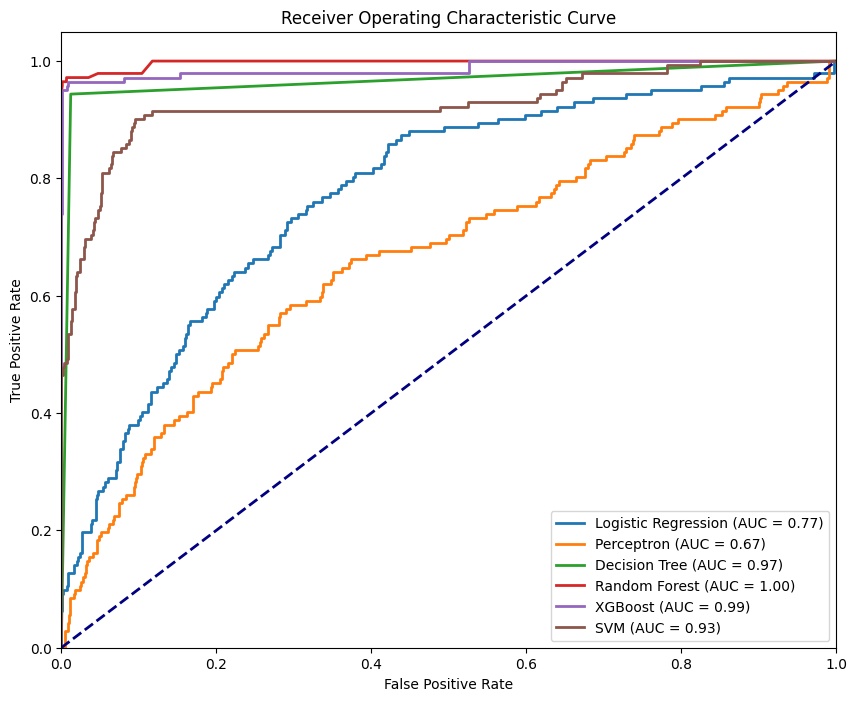

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,Logistic Regression,0.852610,0.845805,0.560000,0.197183,0.291667,0.774048
1,Perceptron,0.765599,0.815193,0.384615,0.246479,0.300429,0.665150
2,Decision Tree,0.954368,0.980726,0.937063,0.943662,0.940351,0.965750
3,Random Forest,0.979310,0.988662,1.000000,0.929577,0.963504,0.997302
4,XGBoost,0.978460,0.989796,0.985401,0.950704,0.967742,0.986858
5,SVM,0.903346,0.917234,0.925926,0.528169,0.672646,0.926485


In [5]:
def evaluate_models(X_train, y_train, X_test, y_test) -> pd.DataFrame:
    """  
    Evaluate different classification models and compare their performance.

    Parameters:
    X_train (array-like): Training features.
    y_train (array-like): Training labels.
    X_test (array-like): Testing features.
    y_test (array-like): Testing labels.

    Returns:
    pd.DataFrame: A DataFrame containing model names, training and testing performance metrics, and standard deviations.
    """

    # Initialize models
    models = [
        ('Logistic Regression', LogisticRegression()),
        ('Perceptron', Perceptron()),
        ('Decision Tree', DecisionTreeClassifier()),
        ('Random Forest', RandomForestClassifier()),
        ('XGBoost', XGBClassifier()),
        ('SVM', SVC())
    ]

    # Initialize result DataFrame
    result = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC'])

    # Plot ROC for all models
    plt.figure(figsize=(10, 8))
    for model_name, model in models:
        # Cross-validation
        kfold = StratifiedKFold(n_splits=5)
        cross_val_result = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

        # Train the model with class weights
        model.fit(X_train, y_train)
        
        # Test the model
        predictions   = model.predict(X_test)
        test_accuracy = accuracy_score(y_test, predictions)
        precision     = precision_score(y_test, predictions, zero_division=0)
        recall        = recall_score(y_test, predictions)
        f1            = f1_score(y_test, predictions)
        
        # Check if the model has predict_proba method
        if hasattr(model, 'predict_proba'):
            prob_pos = model.predict_proba(X_test)[:, 1]  # Probability of positive class
        else:  # If not, use decision_function
            prob_pos = model.decision_function(X_test)

        roc_auc = roc_auc_score(y_test, prob_pos)  # Calculate ROC-AUC
        
        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_test, prob_pos)
        
        # Plot ROC curve
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

        # Store results
        result.loc[len(result)] = [model_name, cross_val_result.mean(), test_accuracy, precision, recall, f1, roc_auc]
    
    # Plot settings
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc='lower right')
    plt.show()

    return result

evaluate_models(X_train, y_train, X_test, y_test)

## 4 Model Tuning (Random Forest)
### 4.1 Hyperparameter Tuning

In [6]:
# Initialize a Random Forest Classifier
rfc_model = RandomForestClassifier()

# Fine-tuning parameters
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Stratified K-Fold cross-validation
kfold = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(estimator=rfc_model, param_grid=param_grid, cv=kfold, scoring='precision', verbose=2, n_jobs=-1)
grid_search.fit(X_train,y_train)

# Access the best estimator directly
best_estimator_params = grid_search.best_estimator_.get_params()
best_estimator_params

Fitting 5 folds for each of 144 candidates, totalling 720 fits


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 4.2 Test

In [7]:
# Now you can create a new RandomForestClassifier using the best parameters
best_rfc_model = RandomForestClassifier(**best_estimator_params)

best_rfc_model.fit(X_train,y_train)

# Make predictions on the training set
y_pred_train_rfc = best_rfc_model.predict(X_train)

# Calculate accuracy on the training set
accuracy_train_rfc = accuracy_score(y_train, y_pred_train_rfc)

# Make predictions on the test set
y_pred_test_rfc = best_rfc_model.predict(X_test)

# Calculate metrics on the test set
accuracy_test_rfc = accuracy_score(y_test, y_pred_test_rfc)
precision_test_rfc = precision_score(y_test, y_pred_test_rfc)
recall_test_rfc = recall_score(y_test, y_pred_test_rfc)
f1_test_rfc = f1_score(y_test, y_pred_test_rfc)
roc_auc_test_rfc = roc_auc_score(y_test, y_pred_test_rfc)

# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test_rfc)

print(f"Train Accuracy: {accuracy_train_rfc:.4f}")
print(f"Test Accuracy: {accuracy_test_rfc:.4f}")
print(f"Precision: {precision_test_rfc:.4f}")
print(f"Recall: {recall_test_rfc:.4f}")
print(f"F1-score: {f1_test_rfc:.4f}")
print(f"ROC AUC: {roc_auc_test_rfc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Train Accuracy: 1.0000
Test Accuracy: 0.9898
Precision: 1.0000
Recall: 0.9366
F1-score: 0.9673
ROC AUC: 0.9683
Confusion Matrix:
[[740   0]
 [  9 133]]


## 5 Feature Importance 
using Feature Importance Plot

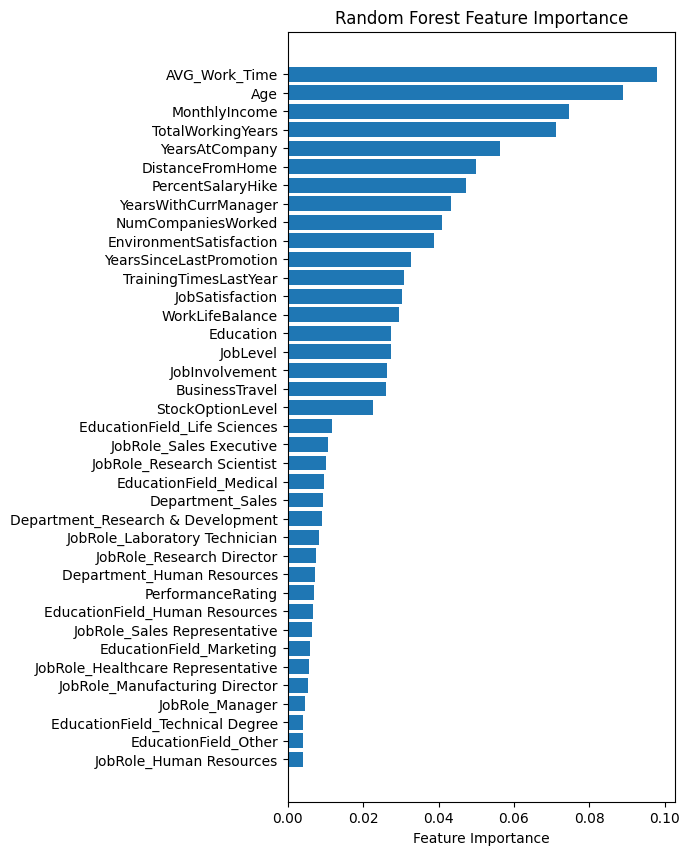

In [8]:
# Create a subplot with desired aspect ratio
fig, ax = plt.subplots(figsize=(5, 10))  # Adjust the size here (width, height)

# Plot feature importance
importances = best_rfc_model.feature_importances_
indices = np.argsort(importances)[::-1]
ax.barh(range(X_train.shape[1]), importances[indices], align='center')
ax.set_yticks(range(X_train.shape[1]))
ax.set_yticklabels([X_train.columns[i] for i in indices])
ax.invert_yaxis()  # Invert y-axis to have the most important feature at the top
ax.set_xlabel('Feature Importance')
ax.set_title('Random Forest Feature Importance')

plt.show()

## 6 Recommendations (Top 5 features)

### 6.1 Features Analysis

In [9]:
df_copy=df.copy()

inverse_scaled_data = scaler.inverse_transform(df[columns_to_scale])

# Update columns with inverse scaled values
df_copy[columns_to_scale] = inverse_scaled_data

In [10]:
df_copy['AVG_Work_Time'].describe()

count    4410.000000
mean        7.314363
std         1.330769
min         5.416880
25%         6.279408
50%         7.011174
75%         7.900785
max        10.937261
Name: AVG_Work_Time, dtype: float64

Text(0, 0.5, 'Count')

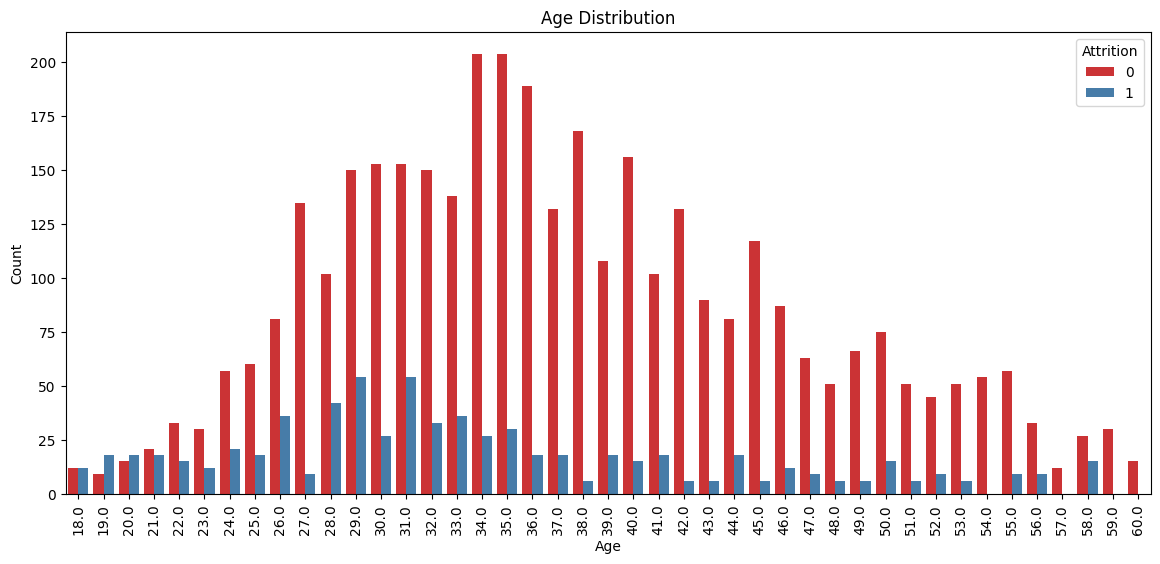

In [11]:
plt.figure(figsize=(14, 6))
plt.xticks(rotation=90)
sns.countplot(data=df_copy, x='Age', hue='Attrition', palette='Set1')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

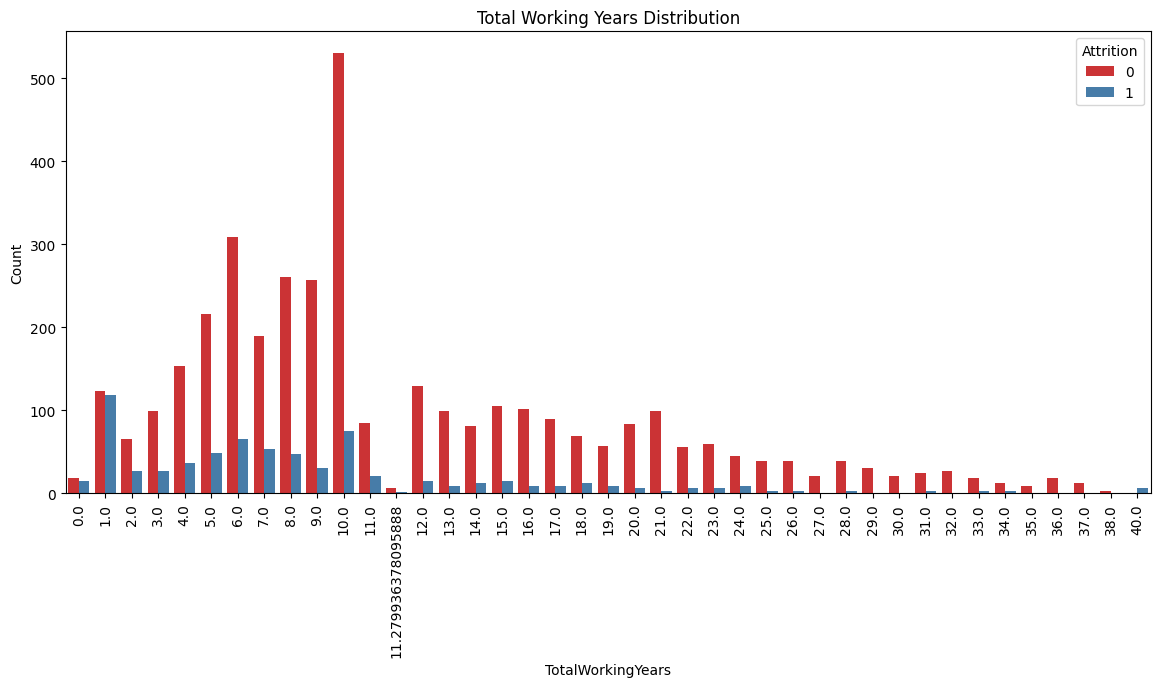

In [12]:
plt.figure(figsize=(14, 6))
plt.xticks(rotation=90)
sns.countplot(data=df_copy, x='TotalWorkingYears', hue='Attrition', palette='Set1')
plt.title('Total Working Years Distribution')
plt.xlabel('TotalWorkingYears')
plt.ylabel('Count')

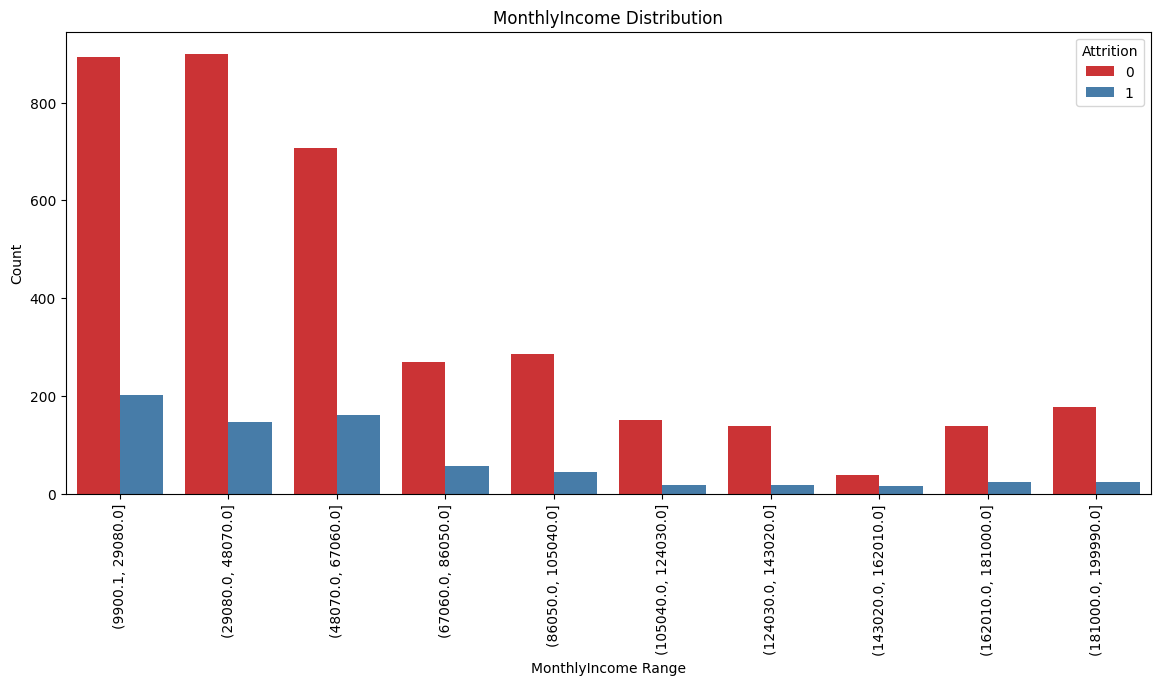

In [13]:
# First, let's create equal-sized bins for 'MonthlyIncome'
num_bins = 10  # You can adjust this number based on your preference
income_bins = pd.cut(df_copy['MonthlyIncome'], bins=num_bins)
# Now, let's plot the count of each range with respect to 'Attrition'
plt.figure(figsize=(14, 6))
plt.xticks(rotation=90)
# Plotting using seaborn countplot
sns.countplot(data=df_copy, x=income_bins, hue='Attrition', palette='Set1')
plt.title('MonthlyIncome Distribution')
plt.xlabel('MonthlyIncome Range')
plt.ylabel('Count')
plt.show()

In [14]:
df_copy['MonthlyIncome'].iloc[:50]

0     131160.0
1      41890.0
2     193280.0
3      83210.0
4      23420.0
5      40710.0
6      58130.0
7      31430.0
8      20440.0
9     134640.0
10     79910.0
11     33770.0
12     55380.0
13     57620.0
14     25920.0
15     53460.0
16     42130.0
17     41270.0
18     24380.0
19     68700.0
20    104470.0
21     96670.0
22     21480.0
23     89260.0
24     65130.0
25     67990.0
26    162910.0
27     27050.0
28    103330.0
29     44480.0
30     68540.0
31     96370.0
32     35910.0
33     54050.0
34     46840.0
35    157870.0
36     15140.0
37     29560.0
38     23350.0
39     51540.0
40     69620.0
41     56750.0
42     23790.0
43     38120.0
44     46480.0
45     29360.0
46     21050.0
47     85780.0
48     27060.0
49     63840.0
Name: MonthlyIncome, dtype: float64

Text(0, 0.5, 'Count')

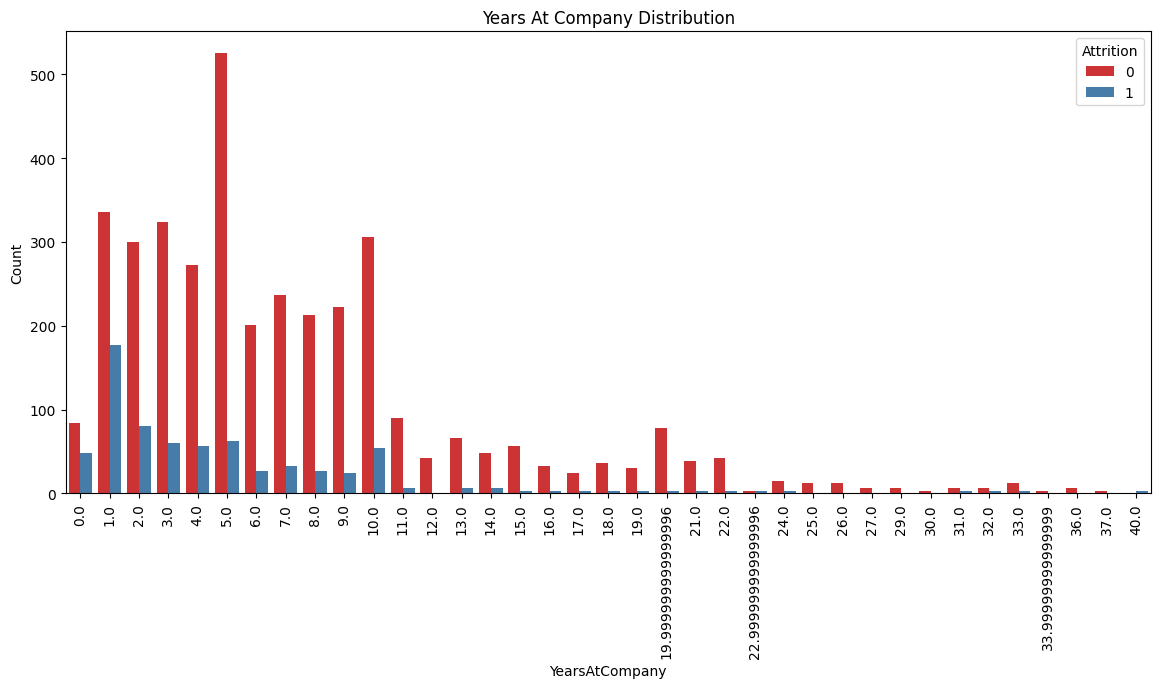

In [15]:
plt.figure(figsize=(14, 6))
plt.xticks(rotation=90)
sns.countplot(data=df_copy, x='YearsAtCompany', hue='Attrition', palette='Set1')
plt.title('Years At Company Distribution')
plt.xlabel('YearsAtCompany')
plt.ylabel('Count')

### 6.2 Feature Tweaking

In [16]:
# Count occurrences where the column's value is True or 1
original_turnover = df['Attrition'].sum()
original_turnover

# Clone DataFrame for each experiment
X1 = df[columns_to_scale].copy()
X2 = df[columns_to_scale].copy()
X3 = df[columns_to_scale].copy()
X4 = df[columns_to_scale].copy()
X5 = df[columns_to_scale].copy()
Xf = df[columns_to_scale].copy()

# Update columns with inverse scaled values
X1[columns_to_scale] = inverse_scaled_data
X2[columns_to_scale] = inverse_scaled_data
X3[columns_to_scale] = inverse_scaled_data
X4[columns_to_scale] = inverse_scaled_data
X5[columns_to_scale] = inverse_scaled_data
Xf[columns_to_scale] = inverse_scaled_data

# Experiment 1: Adjust 'AVG_Work_Time'
exceeding_8 = X1['AVG_Work_Time'] > 8
X1.loc[exceeding_8, 'AVG_Work_Time'] = 8  # Cap the value at 8 hours

# Experiment 2: Increase 'Age' by 10 years
X2['Age'] += 10

# Experiment 3: Increase 'TotalWorkingYears' by 5 years
X3['TotalWorkingYears'] += 5

# Experiment 4: Increase 'MonthlyIncome' by 20.000 Indian Rupees
X4['MonthlyIncome'] += 20000

# Experiment 5: Increase 'YearsAtCompany' by 6 years
X5['YearsAtCompany'] += 6

# Final Experiment: 
exceeding_8 = Xf['AVG_Work_Time'] > 8
Xf.loc[exceeding_8, 'AVG_Work_Time'] = 8  # Cap the value at 8 hours
Xf['Age'] += 10
Xf['TotalWorkingYears'] += 5
Xf['MonthlyIncome'] += 20000
Xf['YearsAtCompany'] += 6

# Scale the modified data
X1_scaled = scaler.transform(X1)
X2_scaled = scaler.transform(X2)
X3_scaled = scaler.transform(X3)
X4_scaled = scaler.transform(X4)
X5_scaled = scaler.transform(X5)
Xf_scaled = scaler.transform(Xf)

# Predictions for each experiment
y1 = best_rfc_model.predict(X1_scaled)
y2 = best_rfc_model.predict(X2_scaled)
y3 = best_rfc_model.predict(X3_scaled)
y4 = best_rfc_model.predict(X4_scaled)
y5 = best_rfc_model.predict(X5_scaled)
yf = best_rfc_model.predict(Xf_scaled)

# Calculate turnover for each experiment
new_turnover1 = (y1 == 1).sum()
new_turnover2 = (y2 == 1).sum()
new_turnover3 = (y3 == 1).sum()
new_turnover4 = (y4 == 1).sum()
new_turnover5 = (y5 == 1).sum()
new_turnoverf = (yf == 1).sum()

# Output results
print(f"Original turnover count: {original_turnover}")
print(f"Turnover count after caping AVG_Work_Time at 8 hours: {new_turnover1}")
print(f"Turnover count after increasing Age by 10 years: {new_turnover2}")
print(f"Turnover count after increasing TotalWorkingYears by 5 years: {new_turnover3}")
print(f"Turnover count after increasing MonthlyIncome by 20.000 Indian Rupees: {new_turnover4}")
print(f"Turnover count after increasing YearsAtCompany by 6 years: {new_turnover5}")

C:\Users\Nadir\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Nadir\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Nadir\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Nadir\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Nadir\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Nadir\anaconda3\Lib\site-packages\sklearn\base.py:4

Original turnover count: 711
Turnover count after caping AVG_Work_Time at 8 hours: 703
Turnover count after increasing Age by 10 years: 633
Turnover count after increasing TotalWorkingYears by 5 years: 686
Turnover count after increasing MonthlyIncome by 20.000 Indian Rupees: 695
Turnover count after increasing YearsAtCompany by 6 years: 684


#### 6.2.1 AVG_Work_Time
- **Analysis:** The top-ranking feature in importance was the average work time, indicating its paramount significance in predicting turnover rates. The capping of this column's values at 8 hours resulted in a notable decrease in turnover, emphasizing the critical impact of employees' time commitment on attrition.

- **Recommendations:**
  - Avoid crunch time at any cost.
  - Consider offering flexible working hours to further support employee well-being and retention.
  - Communicate transparently with employees about the reasons behind the adjustment in working hours.
  - Gather feedback from employees to understand how the adjusted working hours have impacted their satisfaction.

#### 6.2.2 Age
   - **Analysis:** Age emerges as the second most influential factor in predicting turnover rates, following closely behind the average worked time. Increasing the age of employees by 10 years led to a significant reduction in turnover counts, from 711 to 563. This underscores the pivotal role of age in shaping attrition dynamics, suggesting that older employees are less prone to leaving the company.
   
   - **Recommendations:**
      - Prioritize retention efforts for younger employees to mitigate turnover risks.
      - Develop robust onboarding and career advancement programs for early-career professionals.
      - Cultivate a supportive work environment that addresses the needs and aspirations of younger talent.

#### 6.2.3 TotalWorkingYears
   - **Analysis:** The TotalWorkingYears feature demonstrates its significance as another influential factor affecting turnover rates. Increasing the total number of years worked by employees resulted in a slight reduction in turnover, indicating that individuals with longer tenure are less likely to leave the company.
   - **Recommendations:**
      - Strengthen onboarding programs to effectively integrate new employees into the company culture and workflows, fostering a sense of belonging and commitment from the outset.
      - Develop comprehensive career pathing initiatives that provide clear trajectories for professional growth and advancement within the organization. This can incentivize employees to stay long-term by offering opportunities for skill development and career progression.
      - Implement mentorship programs to provide guidance and support to employees at various stages of their careers. Pairing less experienced employees with seasoned mentors can offer valuable insights, facilitate knowledge transfer, and enhance job satisfaction, thereby reducing turnover rates.

#### 6.2.4 MonthlyIncome
   - **Analysis:** Increasing the MonthlyIncome by 20,000 Indian Rupees that's approximately $240 (March 2024) resulted in a marginal reduction in turnover counts, with turnover dropping. While the impact on turnover rates is minimal, it suggests that higher income levels may have a slight effect on reducing attrition.
   - **Recommendations:**
      - Review and adjust compensation structures to ensure they remain competitive within the industry and region, aiming to attract and retain top talent.
      - Offer additional benefits and perks aligned with employee preferences and needs, such as healthcare coverage, retirement plans, and wellness programs, to enhance overall job satisfaction and loyalty.
      - Conduct regular salary benchmarking exercises to stay informed about market trends and adjust compensation packages accordingly to retain valuable employees.

#### 6.2.5 YearsAtCompany
   - **Analysis:** The slight reduction in turnover counts, upon increasing the number of years at the company by 6 years suggests that newer employees may indeed exhibit a higher likelihood of turnover. This implies that employees with shorter tenures may be more prone to leaving the company.
   - **Recommendations:**
      - Strengthen onboarding processes to seamlessly integrate new employees into the company culture and workflow.
      - Implement initiatives to engage and support new hires during their initial months with the company.
      - Proactively address any challenges or concerns faced by new employees to enhance their experience and retention.

### 6.3 Result With All Recommendations Combined

In [17]:
# Output the results
print(f'Original turnover count: {original_turnover}')
print(f"Turnover count after combining the 5 recommendations: {new_turnoverf}")
print(f'Original turnover rate : {(original_turnover/len(df))*100}%')
print(f'Turnover rate with the new recommendations : {(new_turnoverf/len(df))*100}%')

Original turnover count: 711
Turnover count after combining the 5 recommendations: 119
Original turnover rate : 16.122448979591837%
Turnover rate with the new recommendations : 2.6984126984126986%


## Conclusion
The analysis demonstrates the profound impact of adjusting key factors on turnover rates. By reducing average worked time, increasing age, total working years, and tenure, turnover rrate decreased significantly from about 16% to nearly 3%. This underscores the importance of tailored retention strategies focusing on employee engagement and career development. Moving forward, continuous evaluation and adaptation of these strategies are crucial for sustaining employee retention and organizational success.